Code primarily done by Charles Barnes

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
import random as rn

In [2]:
lmt_url = "https://raw.githubusercontent.com/cchbarnes/stats21_repo/main/LMT_final.csv"
lmt = pd.read_csv(lmt_url)

In [3]:
lmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,82.120003,82.989998,81.769997,82.019997,58.203526,2273600
1,2012-01-04,80.949997,81.449997,80.370003,80.910004,57.415882,2242700
2,2012-01-05,80.660004,80.680000,79.050003,80.070000,56.819771,2616100
3,2012-01-06,80.410004,80.410004,79.650002,79.980003,56.755913,4274300
4,2012-01-09,80.349998,80.349998,79.760002,80.040001,56.798489,1861500


In [4]:
lmt.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
621,2014-06-24,163.279999,164.500000,162.460007,162.509995,128.197433,812500
622,2014-06-25,162.649994,162.910004,161.440002,162.449997,128.150085,988400
623,2014-06-26,162.809998,162.809998,160.509995,162.050003,127.834557,988400
624,2014-06-27,162.279999,162.929993,161.860001,162.699997,128.347244,1102200
625,2014-06-30,162.759995,162.830002,160.360001,160.729996,126.793266,1234500


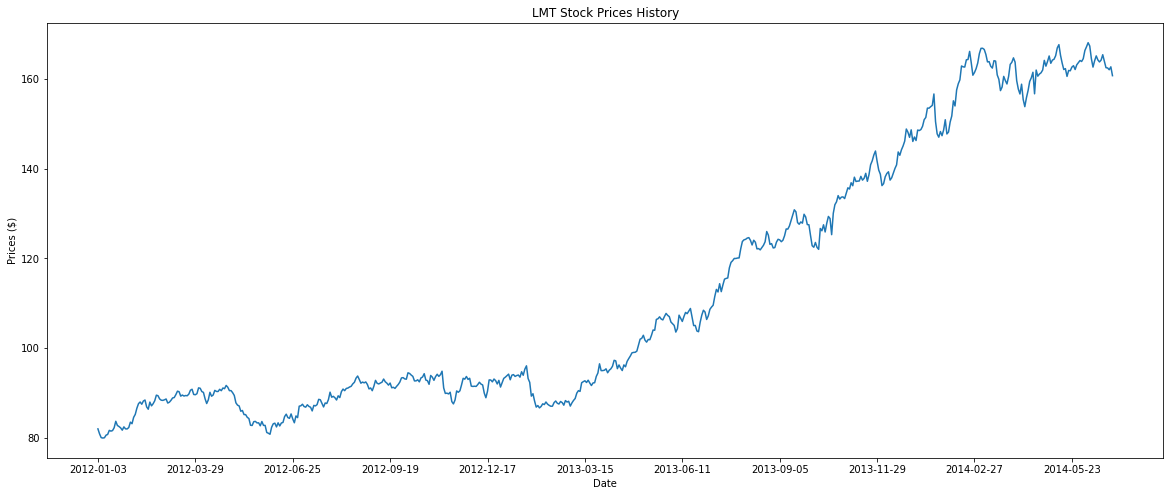

In [5]:
plt.figure(figsize=(20, 8))
plt.title('LMT Stock Prices History')
plt.plot(lmt["Date"], lmt['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.xticks(np.arange(0, len(lmt['Close']), 60))
plt.show()

In [6]:
close_prices = lmt['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(441, 60, 1) (125, 60, 1) (441,) (125,)


In [9]:
rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
lmt_RNN = keras.Sequential()
# First simpleRNN layer with Dropout regularisation
lmt_RNN.add(layers.SimpleRNN(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
lmt_RNN.add(layers.Dropout(0.2))
# Second simpleRNN layer
lmt_RNN.add(layers.SimpleRNN(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
lmt_RNN.add(layers.Dropout(0.2))
# Third simpleRNN layer
lmt_RNN.add(layers.SimpleRNN(units=100, return_sequences=True, activation='tanh'))
lmt_RNN.add(layers.Dropout(0.2))
# Fourth simpleRNN layer
lmt_RNN.add(layers.SimpleRNN(units=100, activation='tanh'))
lmt_RNN.add(layers.Dropout(0.2))
# Fully connected layer
lmt_RNN.add(layers.Dense(100))
lmt_RNN.add(layers.Dropout(0.2))
# The output layer
lmt_RNN.add(layers.Dense(units=1))
lmt_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 100)           10200     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 100)           20100     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 100)           20100     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100)               2

In [10]:
# Compiling the RNN
lmt_RNN.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
rnn_history = lmt_RNN.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
14/14 [==============================] - 18s 256ms/step - loss: 0.7885
Epoch 2/20
14/14 [==============================] - 3s 184ms/step - loss: 0.4161
Epoch 3/20
14/14 [==============================] - 3s 190ms/step - loss: 0.3199
Epoch 4/20
14/14 [==============================] - 3s 187ms/step - loss: 0.2457
Epoch 5/20
14/14 [==============================] - 3s 200ms/step - loss: 0.1870
Epoch 6/20
14/14 [==============================] - 4s 271ms/step - loss: 0.1758
Epoch 7/20
14/14 [==============================] - 4s 246ms/step - loss: 0.2050
Epoch 8/20
14/14 [==============================] - 3s 182ms/step - loss: 0.2356
Epoch 9/20
14/14 [==============================] - 3s 213ms/step - loss: 0.1700
Epoch 10/20
14/14 [==============================] - 3s 226ms/step - loss: 0.1337
Epoch 11/20
14/14 [==============================] - 3s 199ms/step - loss: 0.1288
Epoch 12/20
14/14 [==============================] - 3s 187ms/step - loss: 0.1126
Epoch 13/20
14/14 [=====

In [11]:
rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
lmt_GRU = keras.Sequential()
# First GRU layer with Dropout regularisation
lmt_GRU.add(layers.GRU(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
lmt_GRU.add(layers.Dropout(0.2))
# Second GRU layer
lmt_GRU.add(layers.GRU(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
lmt_GRU.add(layers.Dropout(0.2))
# Third GRU layer
lmt_GRU.add(layers.GRU(units=100, return_sequences=True, activation='tanh'))
lmt_GRU.add(layers.Dropout(0.2))
# Fourth GRU layer
lmt_GRU.add(layers.GRU(units=100, activation='tanh'))
lmt_GRU.add(layers.Dropout(0.2))
# Fully connected layer
lmt_GRU.add(layers.Dense(100))
lmt_GRU.add(layers.Dropout(0.2))
# The output layer
lmt_GRU.add(layers.Dense(units=1))
lmt_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 100)           30900     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 60, 100)           60600     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_2 (GRU)                 (None, 60, 100)           60600     
                                                                 
 dropout_7 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_3 (GRU)                 (None, 100)              

In [12]:
# Compiling the RNN
lmt_GRU.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
gru_history = lmt_GRU.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
14/14 [==============================] - 9s 21ms/step - loss: 0.0216
Epoch 2/20
14/14 [==============================] - 0s 15ms/step - loss: 0.0037
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 4/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 5/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 6/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 7/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 8/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 9/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 10/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 11/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 12/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 13/20
14/14 [==================

In [13]:
rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
lmt_LSTMmodel = keras.Sequential()
# Four LSTM layers
lmt_LSTMmodel.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
lmt_LSTMmodel.add(layers.Dropout(0.2))
lmt_LSTMmodel.add(layers.LSTM(100, return_sequences=True))
lmt_LSTMmodel.add(layers.Dropout(0.2))
lmt_LSTMmodel.add(layers.LSTM(100, return_sequences=True))
lmt_LSTMmodel.add(layers.Dropout(0.2))
lmt_LSTMmodel.add(layers.LSTM(100, return_sequences=False))
lmt_LSTMmodel.add(layers.Dropout(0.2))
# Fully connected layer
lmt_LSTMmodel.add(layers.Dense(100))
lmt_LSTMmodel.add(layers.Dropout(0.2))

# Output layer
lmt_LSTMmodel.add(layers.Dense(1))
lmt_LSTMmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout_10 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_11 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)              

In [14]:
lmt_LSTMmodel.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = lmt_LSTMmodel.fit(x_train, y_train, epochs=20, batch_size= 32)

Epoch 1/20
14/14 [==============================] - 7s 21ms/step - loss: 0.0230
Epoch 2/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0027
Epoch 4/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0033
Epoch 5/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 6/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0022
Epoch 7/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 8/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 9/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 10/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 11/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 12/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 13/20
14/14 [==================

In [15]:
simpleRNNpredictions = lmt_RNN.predict(x_test)
simpleRNNpredictions = scaler.inverse_transform(simpleRNNpredictions)
RNN_rmse = np.sqrt(np.mean((simpleRNNpredictions - y_test)**2))
RNN_rmse

4/4 [==============================] - 1s 32ms/step


18.01456327502715

In [16]:
GRUpredictions = lmt_GRU.predict(x_test)
GRUpredictions = scaler.inverse_transform(GRUpredictions)
GRU_rmse = np.sqrt(np.mean((GRUpredictions - y_test)**2))
GRU_rmse

4/4 [==============================] - 1s 8ms/step


9.56504048168552

In [17]:
LSTMpredictions = lmt_LSTMmodel.predict(x_test)
LSTMpredictions = scaler.inverse_transform(LSTMpredictions)
LSTM_rmse = np.sqrt(np.mean((LSTMpredictions - y_test)**2))
LSTM_rmse

4/4 [==============================] - 1s 9ms/step


8.456853713818488

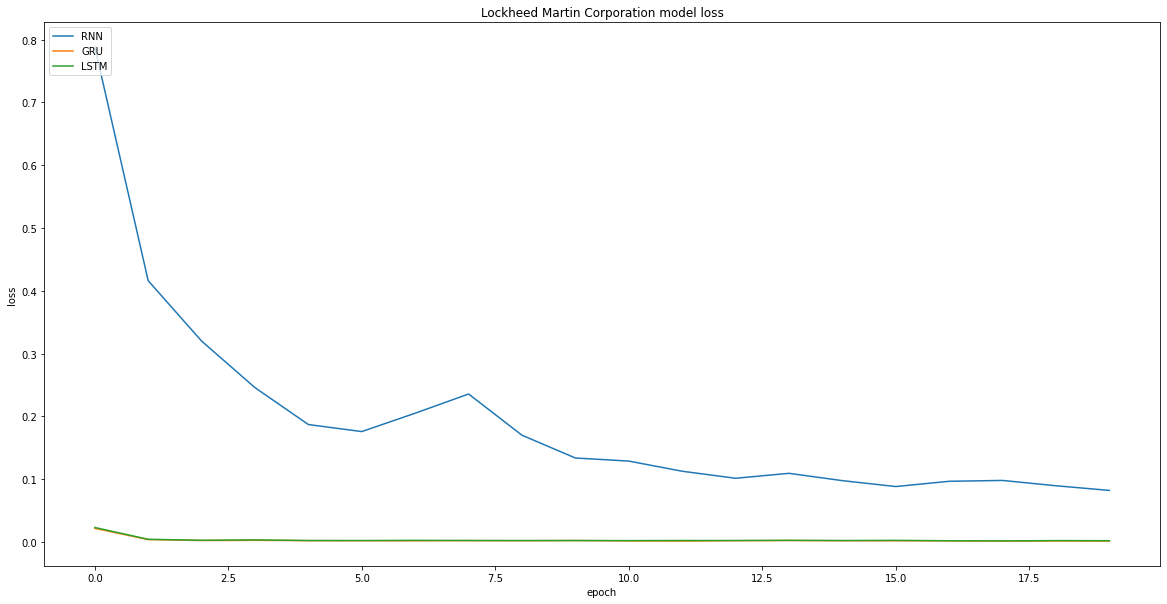

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(rnn_history.history['loss'])
plt.plot(gru_history.history['loss'])
plt.plot(lstm_history.history['loss'])
plt.title('Lockheed Martin Corporation model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RNN', 'GRU', 'LSTM'], loc='upper left')
plt.show()

<ipython-input-19-769d83c5596b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = simpleRNNpredictions


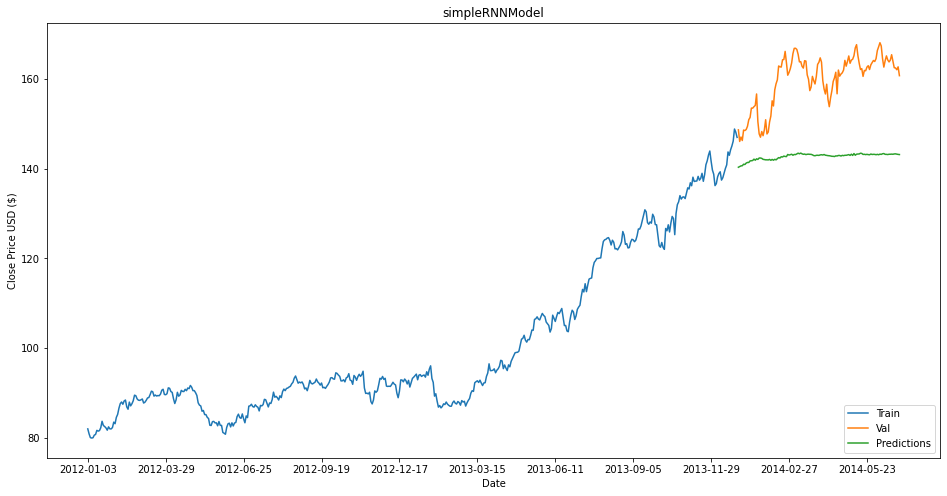

In [19]:
data = lmt.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = simpleRNNpredictions
plt.figure(figsize=(16,8))
plt.title('simpleRNNModel')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(lmt['Close']), 60))
plt.plot(lmt["Date"][:training_data_len], train)
plt.plot(lmt["Date"][training_data_len:], validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-20-0afd57a9cad7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = GRUpredictions


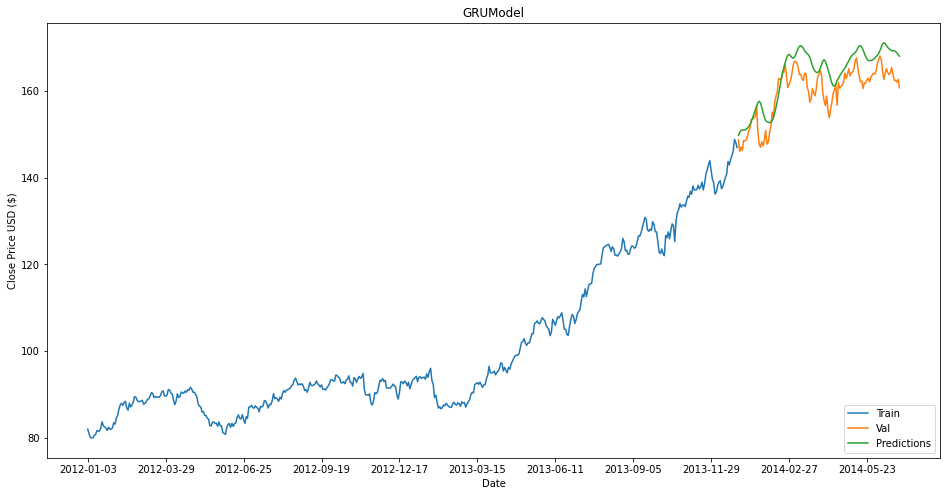

In [20]:
data = lmt.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = GRUpredictions
plt.figure(figsize=(16,8))
plt.title('GRUModel')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(lmt['Close']), 60))
plt.plot(lmt["Date"][:training_data_len], train)
plt.plot(lmt["Date"][training_data_len:], validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-21-080c543ae8eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = LSTMpredictions


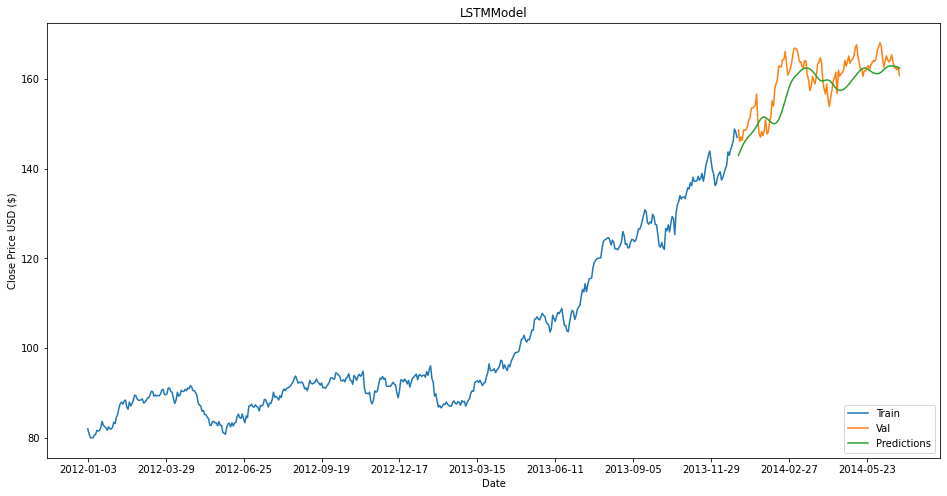

In [21]:
data = lmt.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = LSTMpredictions
plt.figure(figsize=(16,8))
plt.title('LSTMModel')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(lmt['Close']), 60))
plt.plot(lmt["Date"][:training_data_len], train)
plt.plot(lmt["Date"][training_data_len:], validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-22-787afbb15e7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['RNN Predictions'] = simpleRNNpredictions
<ipython-input-22-787afbb15e7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['LSTM Predictions'] = LSTMpredictions
<ipython-input-22-787afbb15e7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

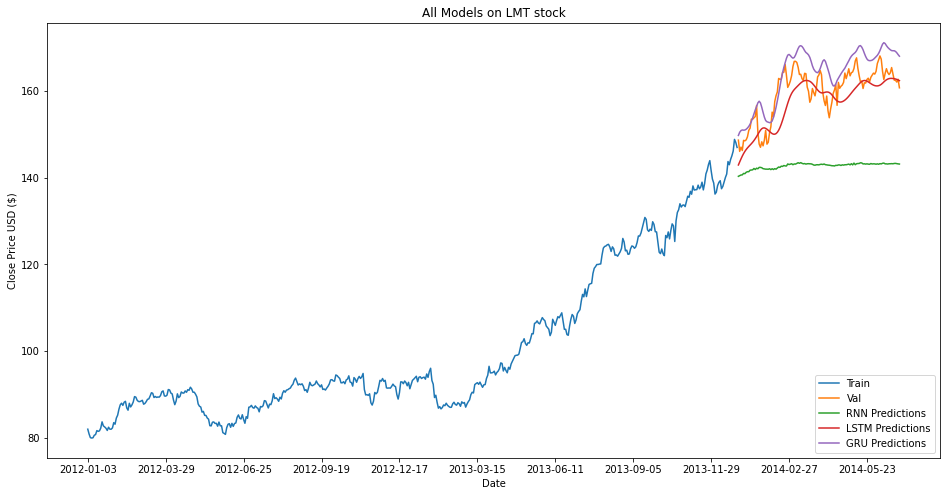

In [22]:
data = lmt.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['RNN Predictions'] = simpleRNNpredictions
validation['LSTM Predictions'] = LSTMpredictions
validation['GRU Predictions'] = GRUpredictions
plt.figure(figsize=(16,8))
plt.title('All Models on LMT stock')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(lmt['Close']), 60))
plt.plot(lmt["Date"][:training_data_len], train)
plt.plot(lmt["Date"][training_data_len:], validation[['Close', 'RNN Predictions']])
plt.plot(lmt["Date"][training_data_len:], validation[['LSTM Predictions']])
plt.plot(lmt["Date"][training_data_len:], validation[['GRU Predictions']])
plt.legend(['Train', 'Val', 'RNN Predictions', "LSTM Predictions", "GRU Predictions"], 
           loc='lower right')
plt.show()